In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.linalg import qr

In [16]:
shp_file_path = '../data/shenzhen_grid/shenzhen_grid.shp'
shenzhen_grid = gpd.read_file(shp_file_path)

In [17]:
centroids = shenzhen_grid.geometry.centroid
x = centroids.x
y = centroids.y
dimension = 14

C:\Users\liboy\AppData\Local\Temp\ipykernel_19296\2105468870.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = shenzhen_grid.geometry.centroid


# 一个网格维度由三个分量组成

In [18]:
# # 生成随机复数矩阵并进行QR分解以近似满足 CC* = I 的条件
# A = np.random.randn(3, 3) + 1j * np.random.randn(3, 3)
# Q, R = qr(A)  # QR分解
# np.save('../data_pe/Q_matrix.npy', Q)

# random_angle_list =[np.random.uniform(0, 2 * np.pi) for _ in range(dimension)]
# pickle_file_path = '../data_pe/random_angle_list.pkl'
# with open(pickle_file_path, 'wb') as file:
#     pickle.dump(random_angle_list, file)

In [19]:
Q = np.load('../data_pe/Q_matrix.npy')
with open('../data_pe/random_angle_list.pkl', 'rb') as file:
    random_angle_list = pickle.load(file)

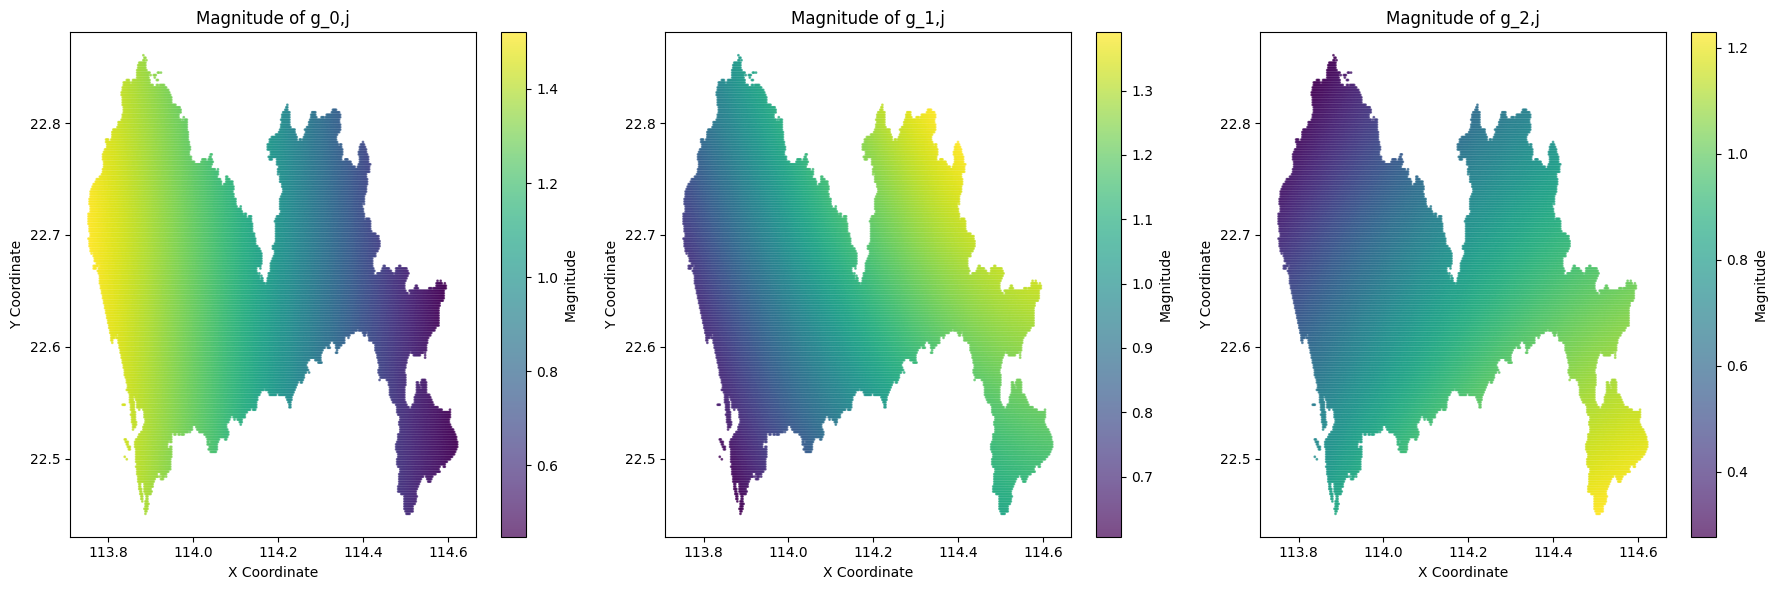

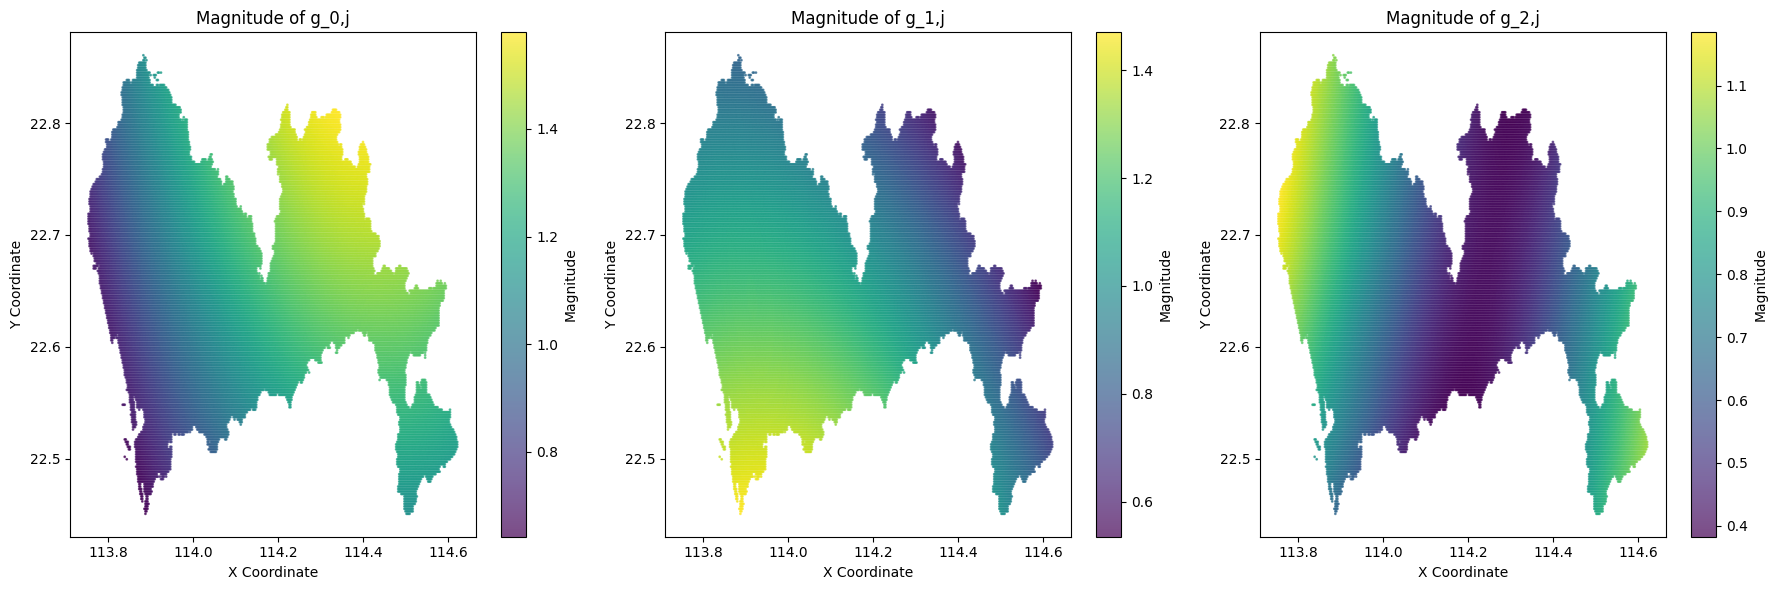

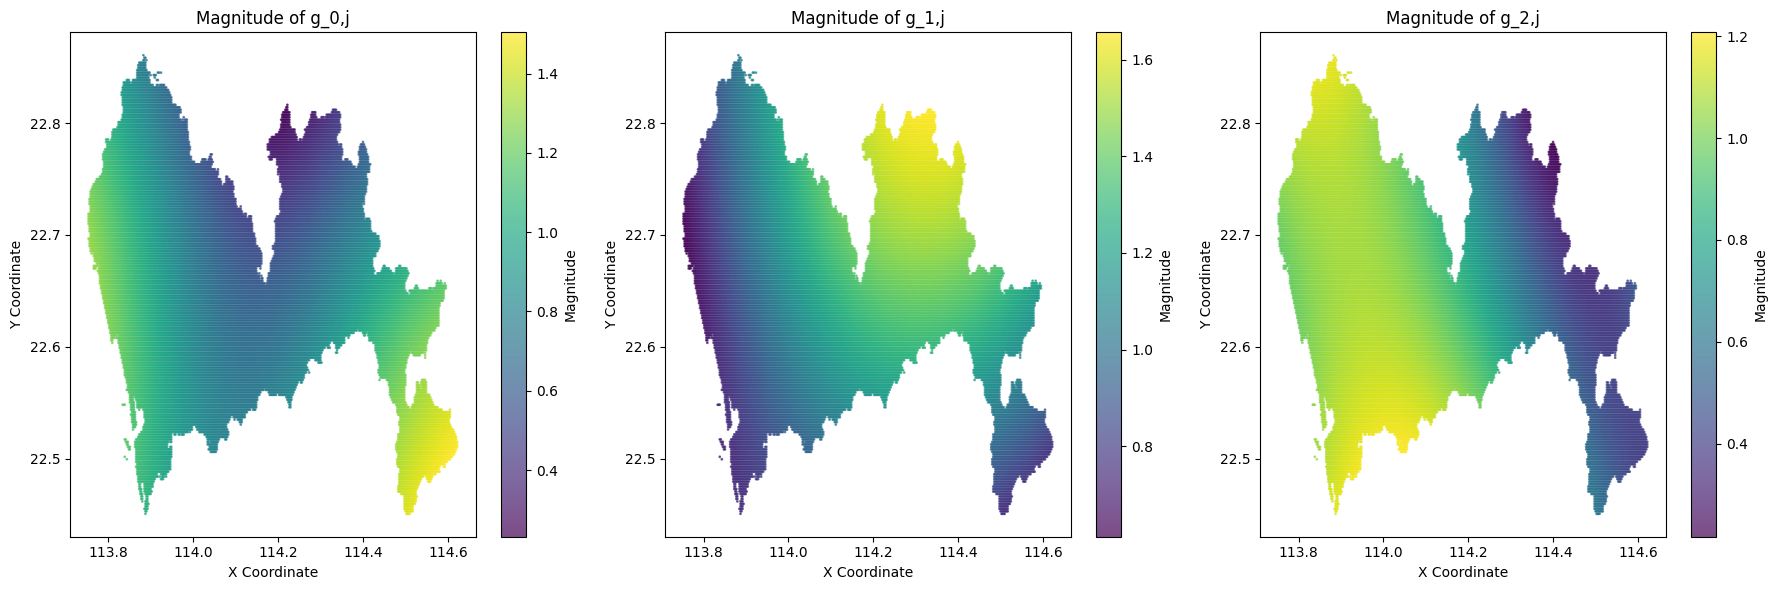

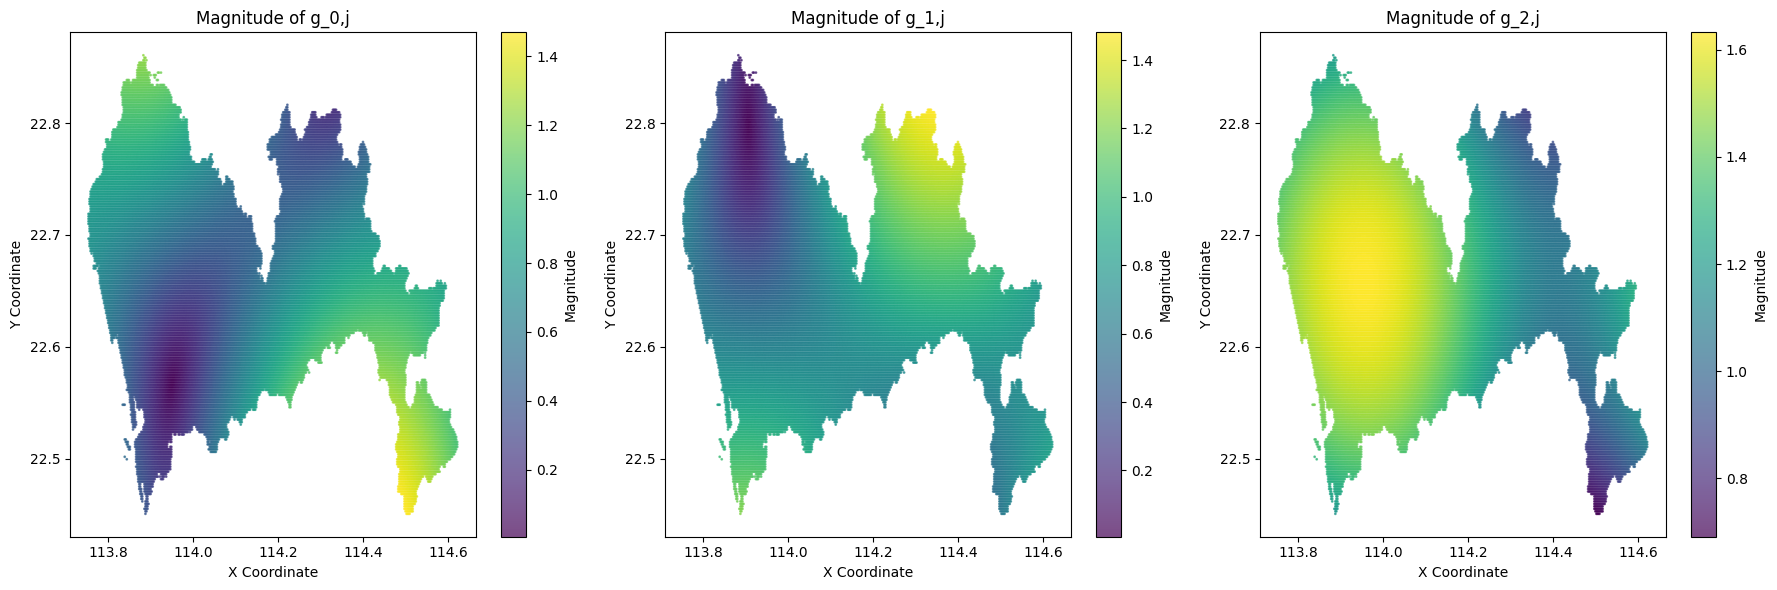

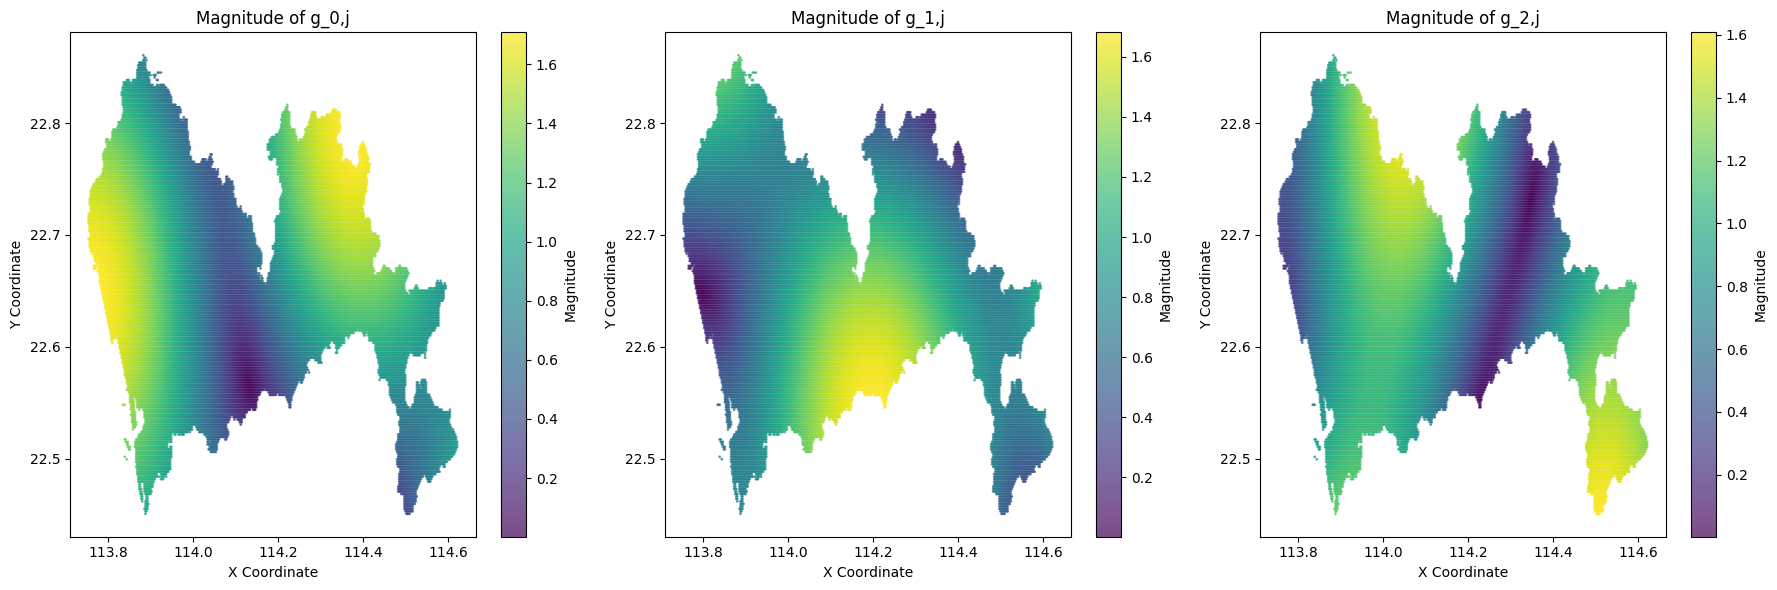

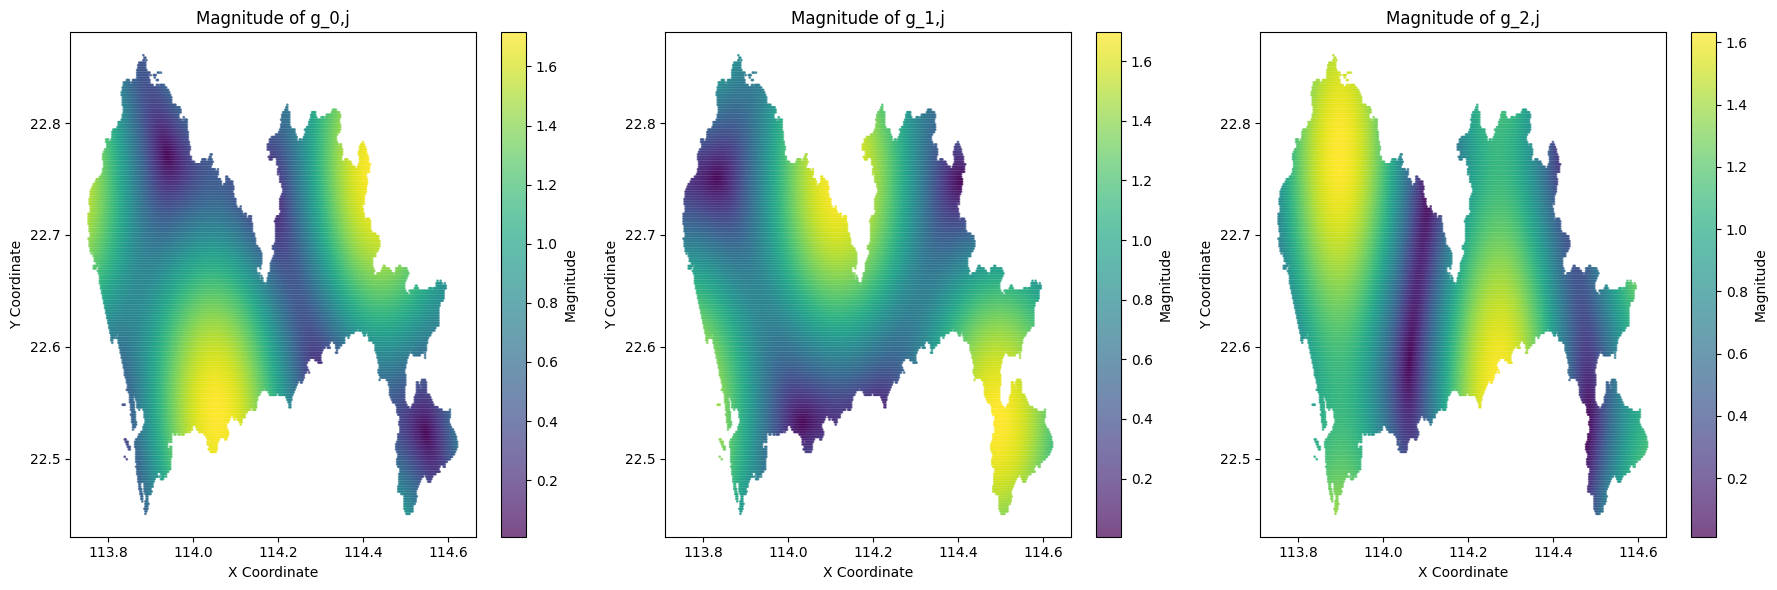

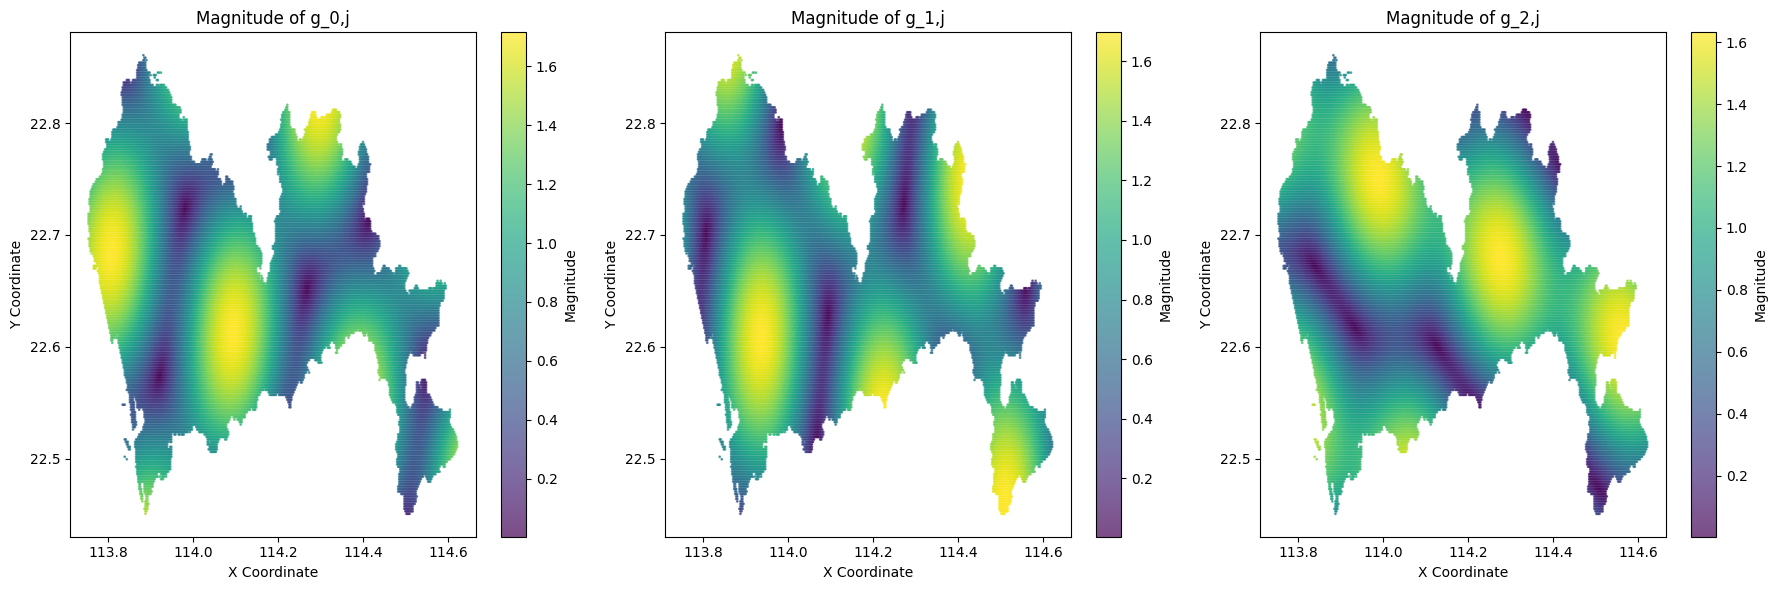

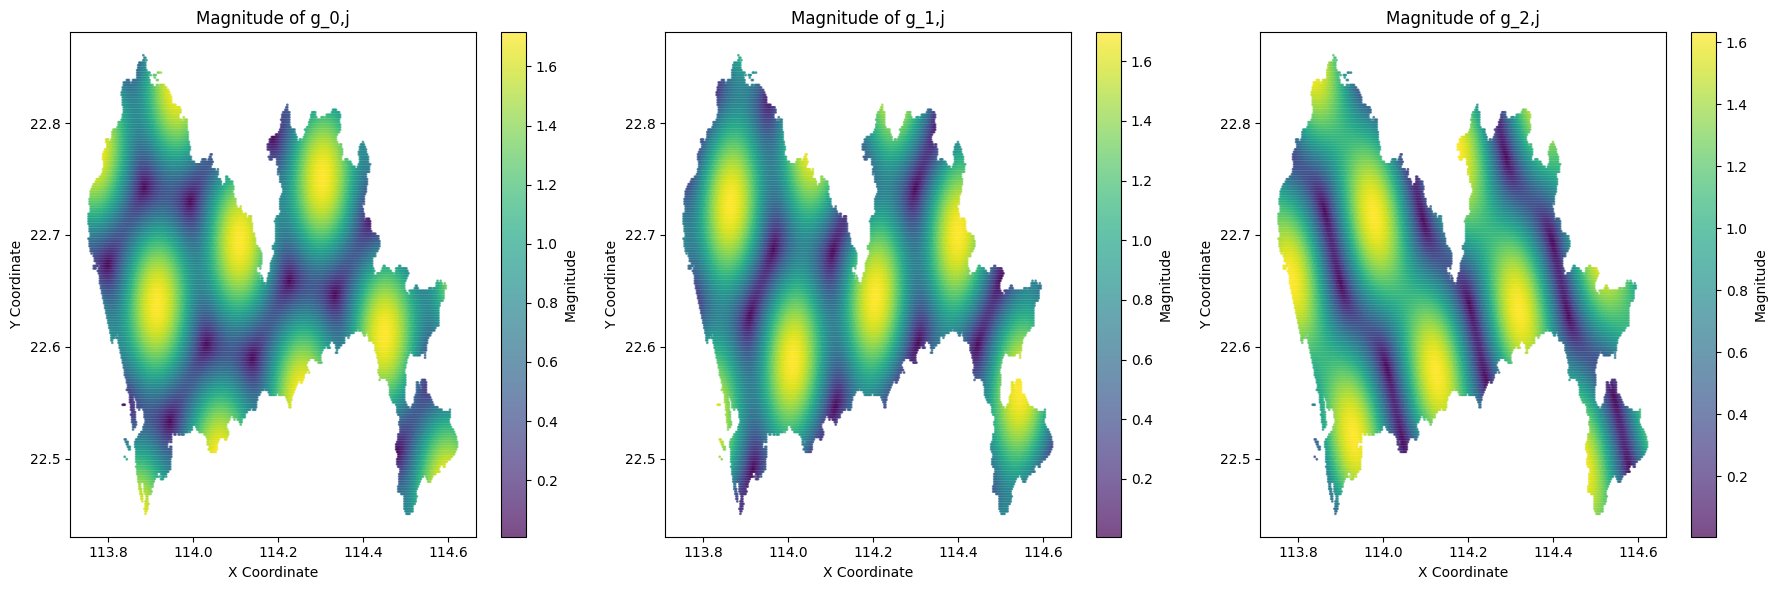

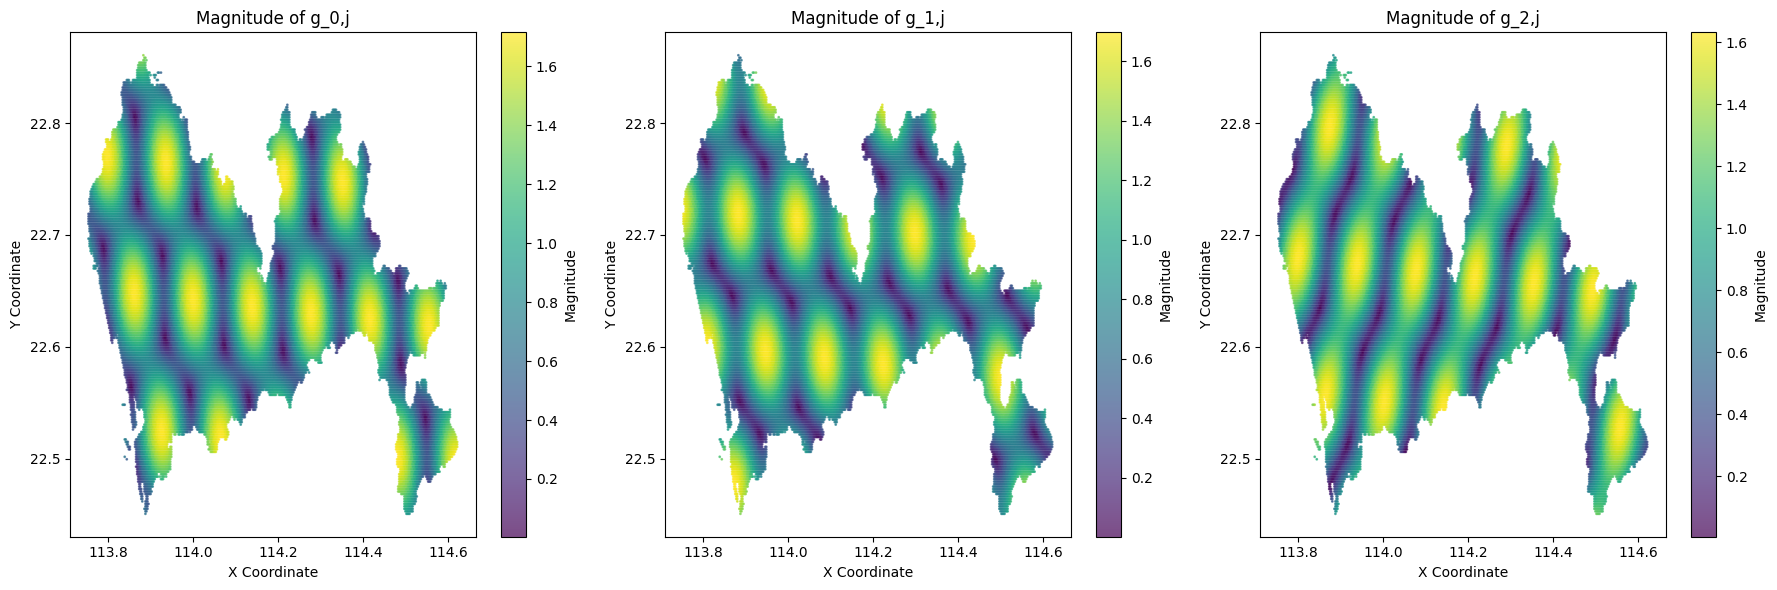

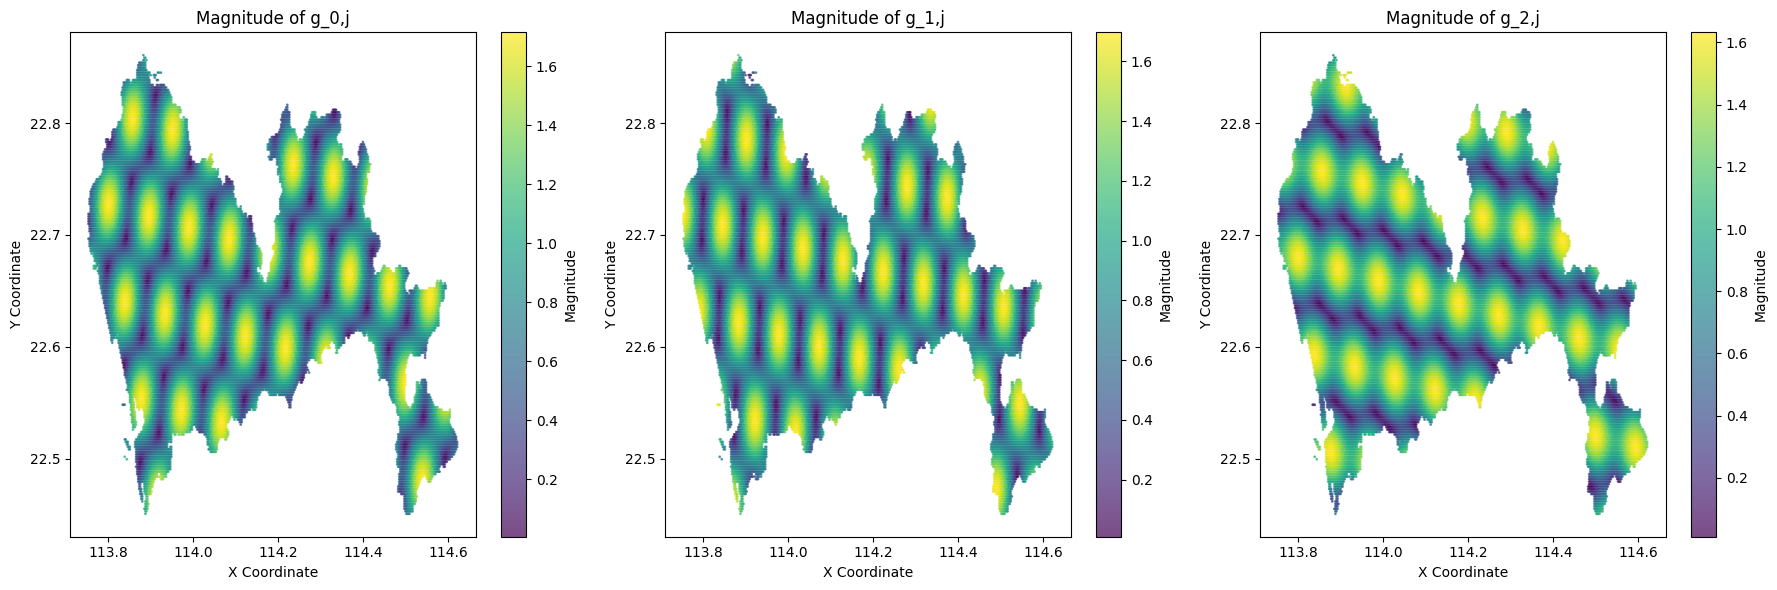

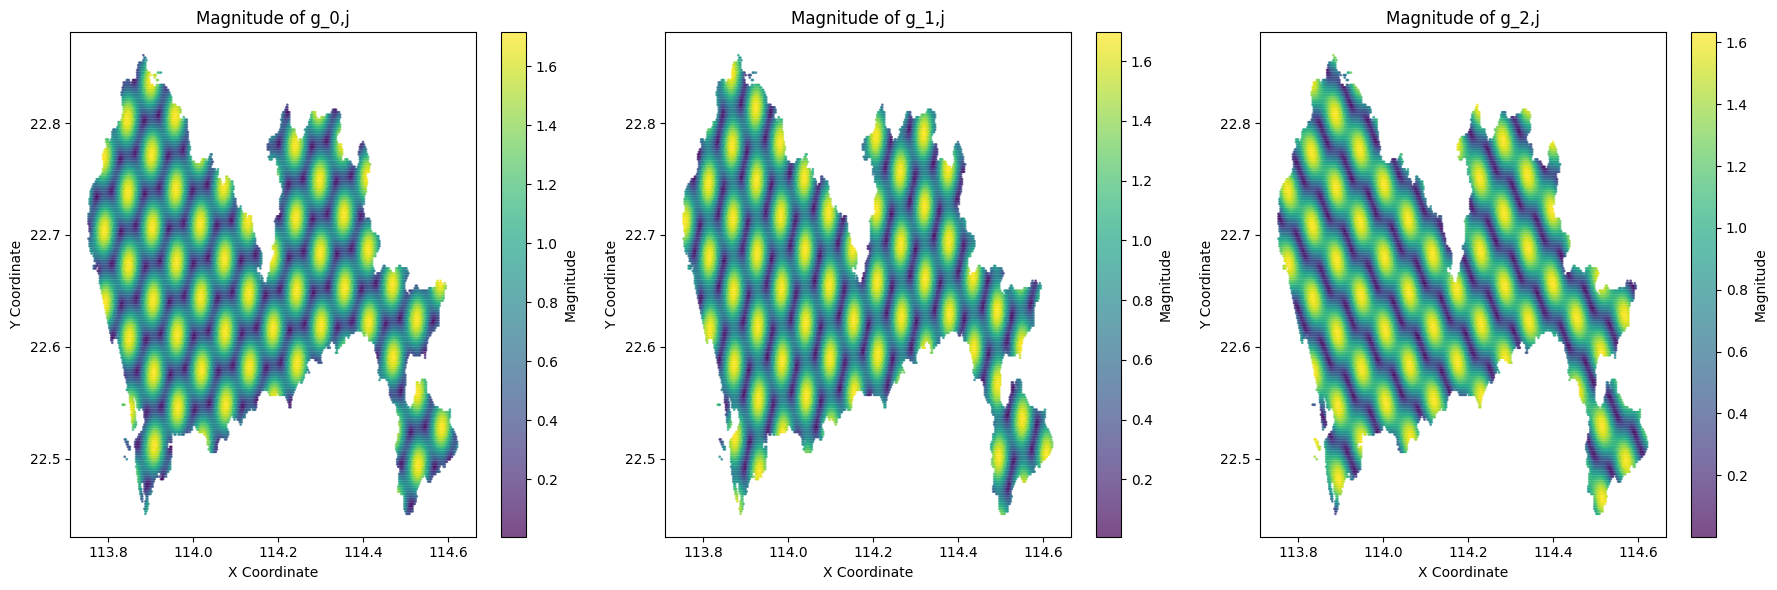

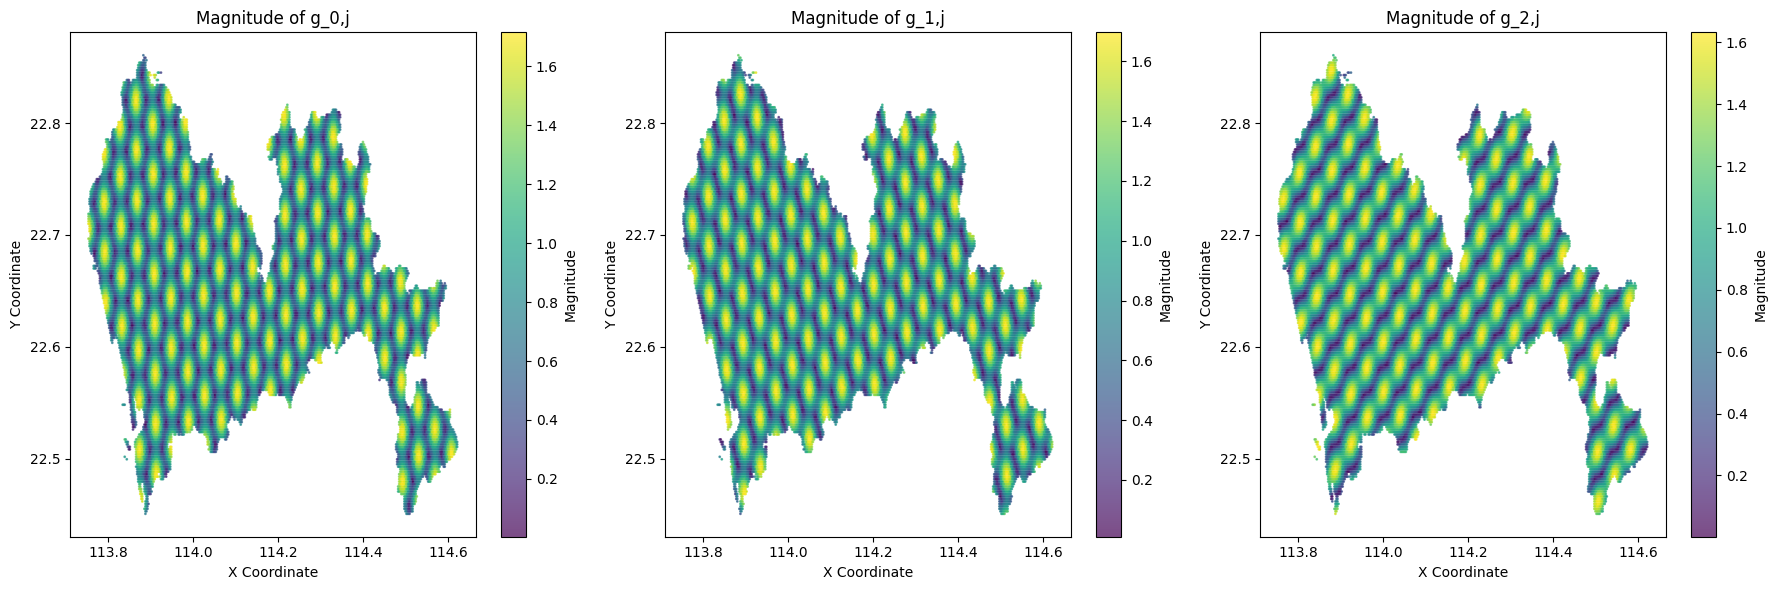

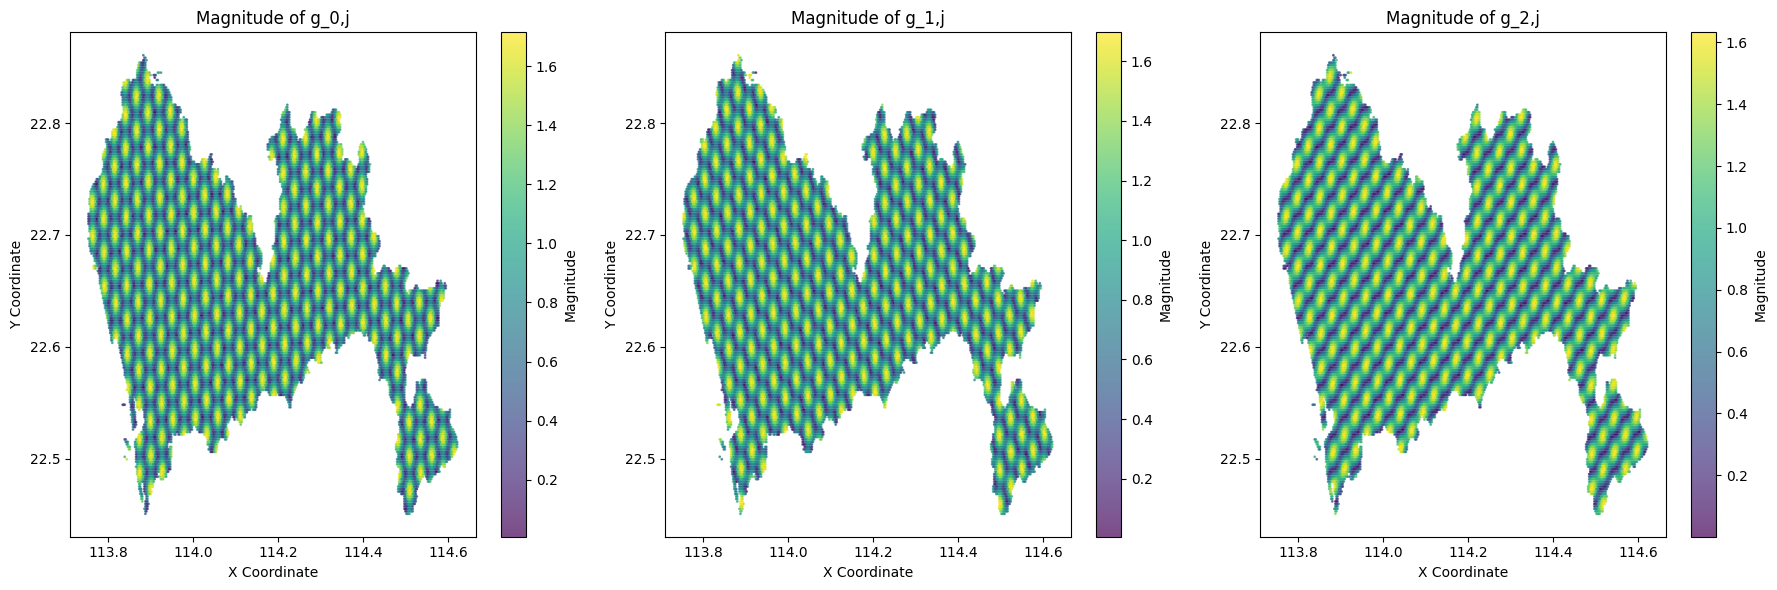

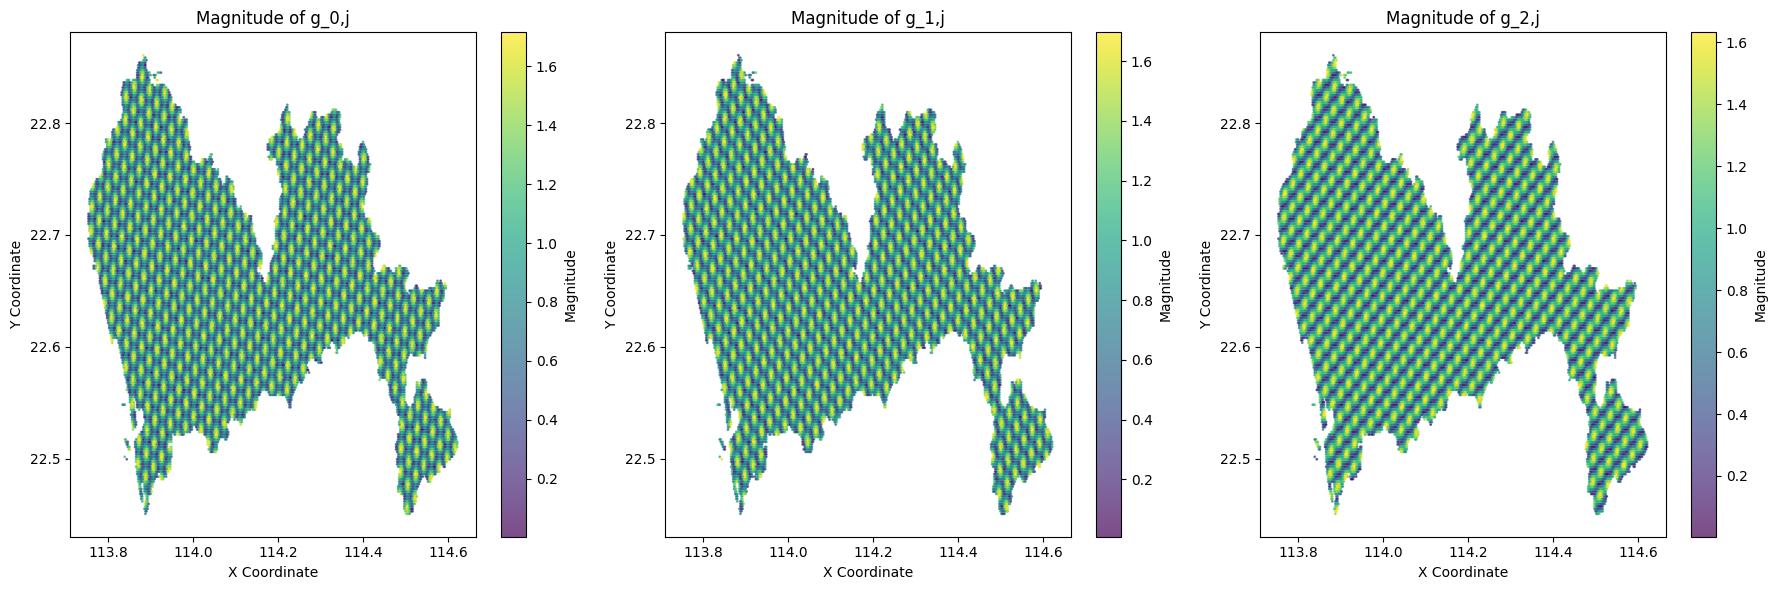

In [20]:
for k in range(1,dimension+1):
    # 定义旋转矩阵
    theta = 2 * np.pi / 3  
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    # 定义omega向量
    random_angle = random_angle_list[k-1]
    scale_factor = (200**(k/dimension))
    omega_n0 = np.array([np.cos(random_angle), np.sin(random_angle)]) * scale_factor
    omega_n1 = R.dot(omega_n0)
    omega_n2 = R.dot(omega_n1)

    # 合并坐标
    coords = np.vstack((x, y))

    # 计算e^(iω'nx)
    eiw0x = np.exp(1j * np.dot(omega_n0,coords))
    eiw1x = np.exp(1j * np.dot(omega_n1,coords))
    eiw2x = np.exp(1j * np.dot(omega_n2,coords))

    # 应用矩阵C(Q作为近似)
    g = Q.dot(np.array([eiw0x, eiw1x, eiw2x]))

    magnitude = np.abs(g)

    # 创建三个子图，分别展示g_nj的每一行对应的模
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    for i in range(3):
        scatter = ax[i].scatter(x, y, c=magnitude[i], cmap='viridis', s=1, alpha=0.7)
        ax[i].set_title(f'Magnitude of g_{i},j')
        ax[i].set_xlabel('X Coordinate')
        ax[i].set_ylabel('Y Coordinate')
        fig.colorbar(scatter, ax=ax[i], label='Magnitude')

    plt.tight_layout()
    plt.show()

C:\Users\liboy\AppData\Local\Temp\ipykernel_19296\669342228.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = shenzhen_grid.geometry.centroid
c:\Users\liboy\anaconda3\envs\jax\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\liboy\anaconda3\envs\jax\lib\site-packages\matplotlib\axes\_axes.py:4455: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


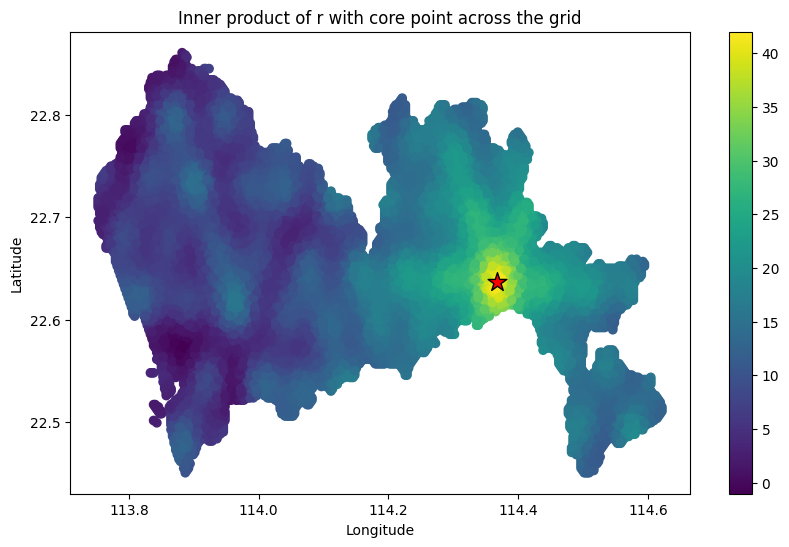

In [21]:
centroids = shenzhen_grid.geometry.centroid
x = centroids.x
y = centroids.y
dimension = 14

g = np.empty((0, len(x))) 
for k in range(1,dimension+1):
    # 定义旋转矩阵
    theta = 2 * np.pi / 3  
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    # 定义omega向量
    random_angle = random_angle_list[k-1]
    scale_factor = (100**(k/dimension))
    omega_n0 = np.array([np.cos(random_angle), np.sin(random_angle)]) * scale_factor
    omega_n1 = R.dot(omega_n0)
    omega_n2 = R.dot(omega_n1)

    # 合并坐标
    coords = np.vstack((x, y))

    # 计算e^(iω'nx)
    eiw0x = np.exp(1j * np.dot(omega_n0,coords))
    eiw1x = np.exp(1j * np.dot(omega_n1,coords))
    eiw2x = np.exp(1j * np.dot(omega_n2,coords))

    # 应用矩阵C(Q作为近似)
    g_n = Q.dot(np.array([eiw0x, eiw1x, eiw2x]))
    if k == 1:
        g = g_n
    else:
        g = np.concatenate((g, g_n), axis=0)

core_point_index = len(x) // 2  # Use the middle point of the flattened grid as the core
# Compute the inner product of r with the core point for all points
inner_products = [np.dot(np.conjugate(g[:, core_point_index]), g[:, r]) for r in range(g.shape[1])]
# Visualize the result of the inner product for the last dimension
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=inner_products, cmap='viridis')
plt.colorbar()
plt.scatter(x[core_point_index], y[core_point_index], c='red', s=200, marker='*', edgecolor='black', label='Core Point')
plt.title('Inner product of r with core point across the grid')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
